In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from model_scoring import scoring
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("cleaned_data.csv")

X = data.drop(["Bankrupt?"], axis=1)
y = data["Bankrupt?"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

cv_model = XGBClassifier(tree_method="hist")
cv_model.fit(X_train, y_train)

grid_search = GridSearchCV(cv_model, {'n_estimators': [1, 10, 100], 'max_depth': [10, 100] }, cv=3, scoring='roc_auc')

print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 100}


'The accuracy score of the model is: 0.9700879765395894 '
'The precision score of the model is: 0.3103448275862069 '
'The recall score of the model is: 0.6206896551724138 '
'The ROC AUC score of the model is: 0.7984116533618631 '


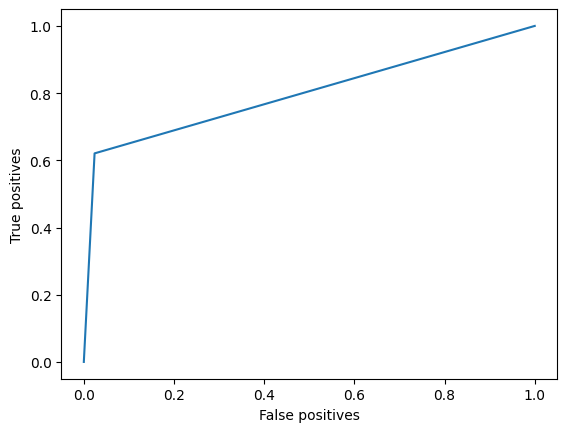

In [16]:
model = XGBClassifier(tree_method="hist", n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
preds = model.predict(X_test)
scoring(preds, y_test)